<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/8_FraccionesParcialesLaplace_CircuitoRLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución de SLIT - Circuito RLC utilizando transformada de Laplace en Sympy

Aplicación de fracciones parciales en circuito RLC:

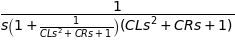

In [23]:
import sympy as sym
import matplotlib.pyplot as plt

sym.init_printing()

s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
#Entrada de interés en Laplace
X = 1/s # Ajustar según tipo de entrada
H = 1/(L*C*s**2 + R*C*s + 1)

Y = H * X #función de transferencia del circuito multiplicada por X(s)
#Función de salida
Y

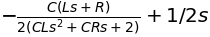

In [24]:
#Función de salida en Laplace factorizada (fracciones parciales)
Yp = Y.apart(s) # el comando apart factoriza la expresión simbólica
Yp

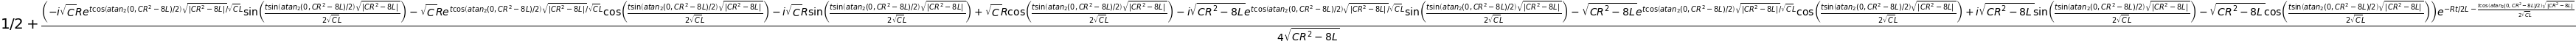

In [25]:
#Modelo en el tiempo en función de RLC
Ye = Yp
#Se recorre cada fracción parcial según factorización para simplificar cálculos
for j in range(len(Ye.args)):
    if j==0:#primer elemento de la solucion
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else: #siguientes elementos concatenados
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t) 
yt

In [26]:
#Modelo en el tiempo con RLC evaluados
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}#valores utilizados para la simulación
Ye = Yp.subs(RLC)
for j in range(len(Ye.args)):
    if j==0:
      yt = sym.inverse_laplace_transform(Ye.args[j], s, t)
    else:
      yt+= sym.inverse_laplace_transform(Ye.args[j], s, t)
 
yt

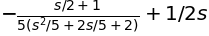

In [27]:
#Función de salida Y(s) -- Laplace
Ye

In [28]:
#Función de salida y(t) -- en tiempo
yt

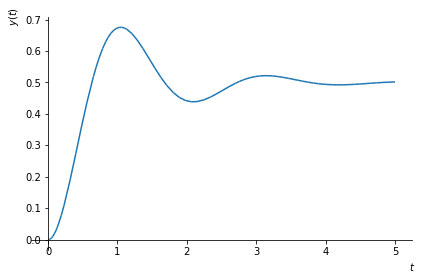

In [29]:
#Gráfica de salida en el tiempo
sym.plot(yt, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$')
plt.show()
